In [6]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

LINEAR KERNEL


In [7]:
X,y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=20  )

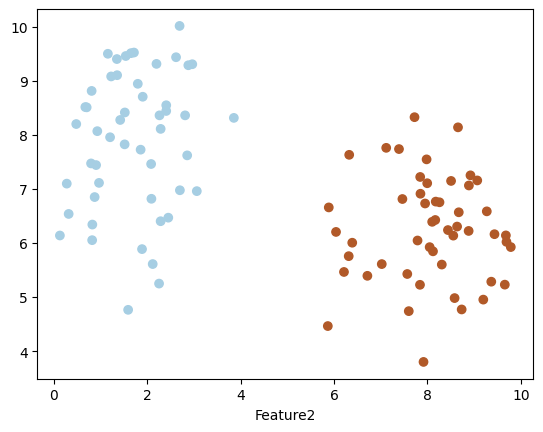

In [9]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired) #X[:,0] = all the rows, first column, c=colour
plt.xlabel("Feature1")
plt.xlabel("Feature2")
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [11]:
svm_linear_model = SVC(kernel="linear", C=9) #C is for regularisation, a value of margin
svm_linear_model.fit(X_train, y_train)

SVC(C=9, kernel='linear')

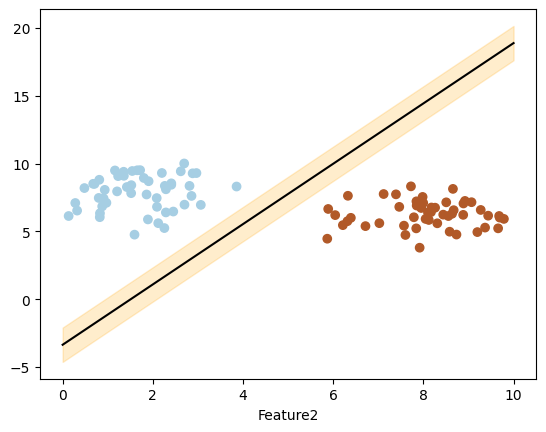

In [17]:
plt.scatter(X[:,0], X[:,1],c=y, cmap=plt.cm.Paired)
w = svm_linear_model.coef_[0] #coef_ =Coefficient, returns numpy container, we grab only the first element
b = svm_linear_model.intercept_[0]
x1 = np.linspace(0,10,100)
x2 = (-w[0] * x1 - b) / w[1]

plt.plot(x1,x2,"k-")

margin = 1 / np.sqrt(np.sum(svm_linear_model.coef_ ** 2))

plt.fill_between(x1, x2 - margin, x2 + margin, alpha=0.2, color="orange")
plt.xlabel("Feature1")
plt.xlabel("Feature2")
plt.show()

POLYNOMIAL KERNEL


In [39]:
X,y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=4)

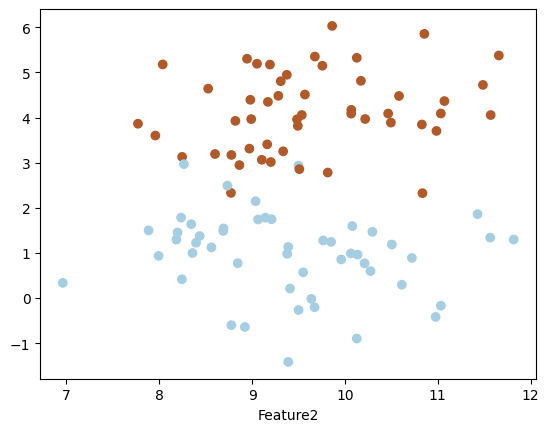

In [40]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired) #X[:,0] = all the rows, first column, c=colour
plt.xlabel("Feature1")
plt.xlabel("Feature2")
plt.show()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [42]:
svm_poly_model = SVC(kernel="poly", degree=3, C=1) #degree=3: We have two-dimensional data, so to achieve a better fit, we transform it into a new dimension, the third dimension. C=regularisation number (C directly influences the margin) 

# The margin is the distance between the separating hyperplane (decision boundary) and the closest data points from either class, known as support vectors.

svm_poly_model.fit(X_train, y_train)

SVC(C=1, kernel='poly')

In [43]:
y_pred_poly = svm_poly_model.predict(X_test)

In [44]:
print(accuracy_score(y_test, y_pred_poly))

0.9


In [45]:
print(classification_report(y_test, y_pred_poly))
print("_____________")
print(confusion_matrix(y_test, y_pred_poly))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.78      1.00      0.88         7

    accuracy                           0.90        20
   macro avg       0.89      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20

_____________
[[11  2]
 [ 0  7]]


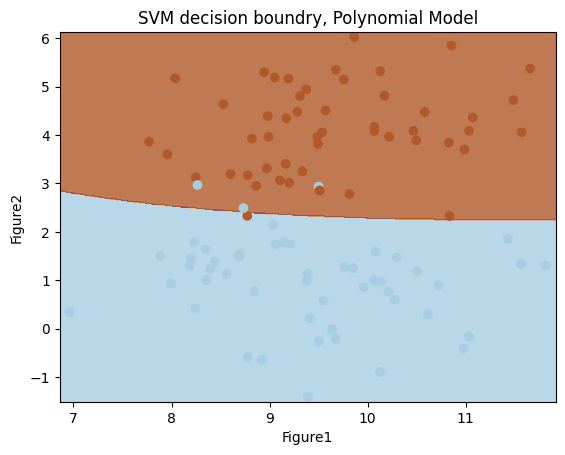

In [46]:
#Determine the range for the plot
# the - 0.1 and + 0.1 are adjustments made to extend the range of x_min and x_max slightly beyond the minimum and maximum values found in the dataset
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
# Create a mesh grid for the feature space
# - `np.linspace(x_min, x_max, 500)` generates 500 evenly spaced points between `x_min` and `x_max`.
# - Similarly, `np.linspace(y_min, y_max, 500)` generates 500 evenly spaced points between `y_min` and `y_max`.
# - `np.meshgrid(...)` takes these two 1D arrays of points and returns two 2D arrays `xx` and `yy`.
# - The 2D array `xx` contains the x-coordinates of the grid, repeated along the rows.
# - The 2D array `yy` contains the y-coordinates of the grid, repeated along the columns.
# - Together, `xx` and `yy` define a grid of points covering the feature space, which can be used for evaluating the decision function of the model.
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Predict the classification for each point in the grid
# - `xx.ravel()` and `yy.ravel()` flatten the 2D arrays `xx` and `yy` into 1D arrays.
# - `np.c_[xx.ravel(), yy.ravel()]` concatenates these two 1D arrays column-wise to create a 2D array where each row is a coordinate pair (x, y).
# - `svm_poly_model.predict(...)` takes this 2D array of coordinate pairs and predicts the class label for each pair using the trained SVM model.
# - The result is a 1D array of predicted class labels for each point in the grid.
# - `Z.reshape(xx.shape)` reshapes this 1D array of predictions back into a 2D array with the same shape as `xx` and `yy`, which corresponds to the grid layout.
Z = svm_poly_model.predict(np.c_[xx.ravel(), yy.ravel()]) 
#Z is a 2D array that holds the predicted class labels for each point in the grid defined by xx and yy
Z = Z.reshape(xx.shape)
# Plot the decision boundary by filling the regions
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
# Plot the data points
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)


plt.xlabel("Figure1")
plt.ylabel("Figure2")
plt.title("SVM decision boundry, Polynomial Model")
plt.show()

RBF KERNEL

In [85]:
X,y = make_blobs(n_samples=200, n_features=2, centers=2, random_state=8)

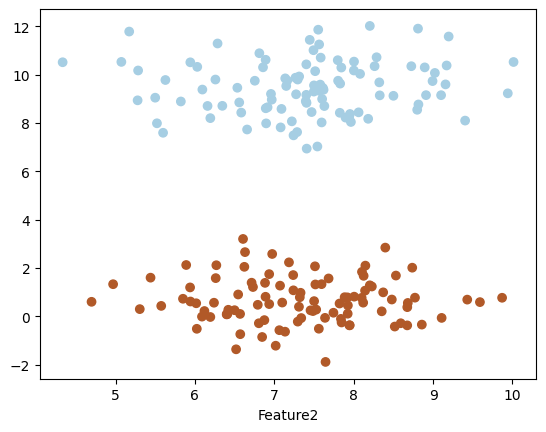

In [86]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired) #X[:,0] = all the rows, first column, c=colour
plt.xlabel("Feature1")
plt.xlabel("Feature2")
plt.show()

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [88]:
svm_rbf_model = SVC(kernel="rbf", gamma=0.7) # gamma defines how far the influence of a single training example reaches.
svm_rbf_model.fit(X_train, y_train)

SVC(gamma=0.7)

In [89]:
y_pred = svm_rbf_model.predict(X_test)


In [90]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("_____________")
print(confusion_matrix(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

_____________
[[23  0]
 [ 0 17]]


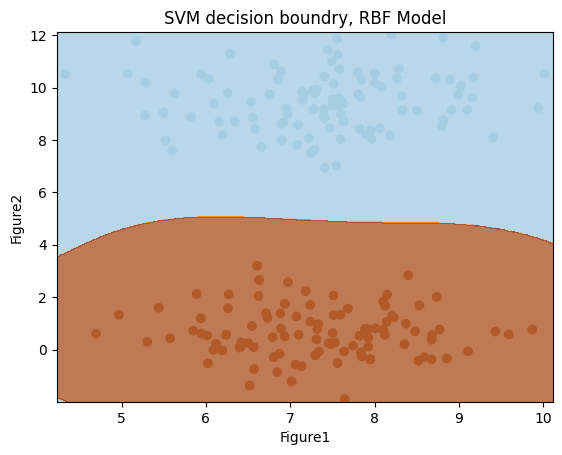

In [91]:
#Determine the range for the plot
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
# Create a mesh grid for the feature space
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Predict the classification for each point in the grid
Z = svm_rbf_model.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)
# Plot the decision boundary by filling the regions
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
# Plot the data points
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)


plt.xlabel("Figure1")
plt.ylabel("Figure2")
plt.title("SVM decision boundry, RBF Model")
plt.show()


In Support Vector Machines (SVM), coefficients and intercepts are key components of the decision function that determines the classification boundary. Here's what they represent:

Coefficient (Weights):

In the context of an SVM, coefficients (often denoted as w) are the weights assigned to the features in the linear decision boundary.
For a linear SVM, the decision function is of the form 
f(x)=w⋅x+b, where w is the weight vector.
These coefficients determine the orientation of the hyperplane in the feature space. In a high-dimensional space, the coefficients indicate the direction of the separating hyperplane.
In a nonlinear SVM (using kernels), the coefficients are associated with the support vectors and contribute to the decision boundary in a transformed feature space.


Intercept (Bias):

The intercept (often denoted as (b) is a scalar value added to the linear combination of the features.
It shifts the decision boundary away from the origin and adjusts the position of the hyperplane.
In the decision function 
f(x)=w⋅x+b, the intercept b helps define the threshold for classification. For instance, in binary classification, the sign of
f(x) determines the class label.


Interpretation in Practice
Coefficients:

They indicate the importance and contribution of each feature to the decision boundary.
Large coefficients imply a strong influence of the corresponding feature on the classification.

Intercept:

Adjusts the classification threshold.
Helps in positioning the hyperplane to best separate the classes.